In [1]:
import glob

In [2]:
list_of_filesM = glob.glob("Dataset-20201023T162720Z-001/Dataset/M/sys/*.txt")
list_of_filesB = glob.glob("Dataset-20201023T162720Z-001/Dataset/B/sys/*.txt")

In [3]:
def TWO_SEQUENCE(l):
    q = []
    q.append(l[0])
    n = len(l)
    i = 1
    two_sequence = []
    while i<n:
        var = q[0]
        two_sequence.append(var+'-'+l[i])
        q.append(l[i])
        i+=1
        q.pop(0)
    return two_sequence

In [4]:
def FileToTwoSequenceList(filename):
    l1 = []
    f = open(filename)
    for line in f:
        l1.append(line)
    f.close()
    n = len(l1)
    if n<2:
        return []
    else:
        l = TWO_SEQUENCE(l1)
    return l

In [5]:
l = []
wordSetTwoSequence = set([])
for filename in list_of_filesB:
    l = FileToTwoSequenceList(filename)
    wordSetTwoSequence = wordSetTwoSequence.union(set(l))
l = []
for filename in list_of_filesM:
    l = FileToTwoSequenceList(filename)
    wordSetTwoSequence = wordSetTwoSequence.union(set(l))

In [6]:
if '\n-\n' in wordSetTwoSequence:
    wordSetTwoSequence.remove('\n-\n')

In [7]:
l = []
output = []
for filename in list_of_filesB:
    wordDict = dict.fromkeys(wordSetTwoSequence,0)
    l1 = FileToTwoSequenceList(filename)
    for word in l1:
        if word != '\n-\n':    
            wordDict[word] += 1
    l.append(wordDict)
    output.append(0)
for filename in list_of_filesM:
    wordDict = dict.fromkeys(wordSetTwoSequence,0)
    l1 = FileToTwoSequenceList(filename)
    for word in l1:
        if word != '\n-\n':
            wordDict[word] += 1
    l.append(wordDict)
    output.append(1)

In [8]:
from sklearn.feature_extraction.text import TfidfTransformer

In [9]:
import pandas as pd

In [10]:
df = pd.DataFrame(l)

In [11]:
tf_transformer = TfidfTransformer(use_idf=False).fit(df)

In [12]:
df1 = pd.DataFrame()

In [13]:
df1 = tf_transformer.transform(df)

In [14]:
df1.shape,df.shape

((5823, 2425), (5823, 2425))

In [15]:
X = pd.DataFrame()
y = pd.DataFrame()

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X = df1#.drop(['output'],axis='columns')
y = output

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [20]:
model_LR = LogisticRegression()

In [21]:
model_LR.fit(X_train,y_train)

LogisticRegression()

In [22]:
accuracies1 = []

In [23]:
accuracies1.append(model_LR.score(X_test,y_test))

In [24]:
model_SVMLinear = SVC(kernel='linear')

In [25]:
model_SVMRBF = SVC(kernel='rbf')

In [26]:
model_SVMLinear.fit(X_train,y_train)

SVC(kernel='linear')

In [27]:
accuracies1.append(model_SVMLinear.score(X_test,y_test))

In [28]:
model_SVMRBF.fit(X_train,y_train)

SVC()

In [29]:
accuracies1.append(model_SVMRBF.score(X_test,y_test))

In [30]:
from matplotlib import pyplot as plt
from sklearn import metrics
from sklearn.metrics import precision_recall_fscore_support

In [31]:
def ROC(model,X_test,y_test):
    metrics.plot_roc_curve(model,X_test,y_test)

In [32]:
def PRINT_METRICS(model_name,y,y_pred,accuracies,index):
    l = []
    t = precision_recall_fscore_support(y,y_pred,average='macro')
    l.append(t[0])
    l.append(t[1])
    l.append(t[2])
    l.append(accuracies[index])
    print(model_name)
    print('Precision:'+str(l[0])+'|Recall:'+str(l[1])+'|F1_measure:'+str(l[2])+'|accuracy:'+str(l[3]))

In [33]:
#functions defined now will plot ROC curve and all the metrics separately
#First Logistics Regression
y = [] #this is to be used for all 
for val in y_test:
    y.append(val)

In [34]:
#printing metrics of Logistics Regression
y_predL = model_LR.predict(X_test)
y_predSVML = model_SVMLinear.predict(X_test)
y_predSVMR = model_SVMRBF.predict(X_test)

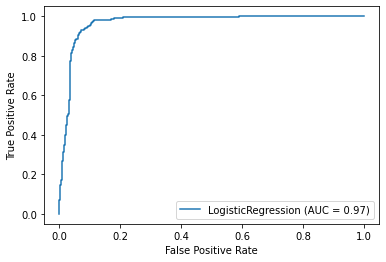

In [35]:
#plotting ROC for logistics regression
ROC(model_LR,X_test,y_test)

In [36]:
PRINT_METRICS('MODEL:LOGISTICS_REGRESSION',y,y_predL,accuracies1,0)

MODEL:LOGISTICS_REGRESSION
Precision:0.9182939033665586|Recall:0.9242997636778547|F1_measure:0.9208048958621906|accuracy:0.9227246708643388


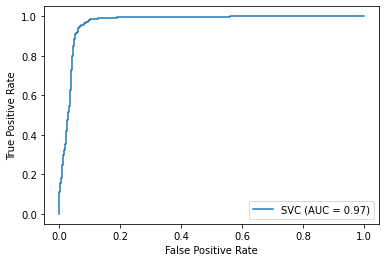

In [37]:
#plotting ROC for SVMLinear
ROC(model_SVMLinear,X_test,y_test)

In [38]:
PRINT_METRICS('MODEL:SVM(LINEAR)',y,y_predSVML,accuracies1,1)

MODEL:SVM(LINEAR)
Precision:0.9259611711690053|Recall:0.9316689270216643|F1_measure:0.9283916322625037|accuracy:0.9301659988551803


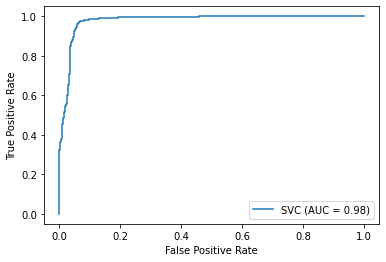

In [39]:
#plotting ROC for SVMRBF
ROC(model_SVMRBF,X_test,y_test)

In [40]:
PRINT_METRICS('MODEL:SVM(RBF)',y,y_predSVMR,accuracies1,2)

MODEL:SVM(RBF)
Precision:0.9441971805174891|Recall:0.9461812182095282|F1_measure:0.9451483773344376|accuracy:0.9467658843732112


In [41]:
def THREE_SEQUENCE(l):
    queue_three = []
    queue_three.append(l[0])
    queue_three.append(l[1])
    i = 2
    n = len(l)
    three_words = []
    while i<n:
        var1 = queue_three[0]
        queue_three.pop(0)
        var2 = queue_three[0]
        three_words.append(var1+'-'+var2+'-'+l[i])
        queue_three.append(l[i])
        i+=1
    return three_words

In [42]:
def FileToThreeSequenceList(filename):
    l1 = []
    f = open(filename)
    for line in f:
        l1.append(line)
    f.close()
    n = len(l1)
    i = 0
    l = []
    while i<n/64:
        l.append(l1[i])
        i+=1
    n = len(l)
    if n<3:
        return []
    else:
        return THREE_SEQUENCE(l)

In [43]:
l = []
wordSet = set([])
for filename in list_of_filesB:
    l = FileToThreeSequenceList(filename)
    wordSet = wordSet.union(set(l))
l = []
for filename in list_of_filesM:
    l = FileToThreeSequenceList(filename)
    wordSet = wordSet.union(set(l))

In [44]:
l = []
output = []
for filename in list_of_filesB:
    wordDict = dict.fromkeys(wordSet,0)
    l1 = FileToThreeSequenceList(filename)
    for word in l1:
        wordDict[word] += 1
    l.append(wordDict)
    output.append(0)
for filename in list_of_filesM:
    wordDict = dict.fromkeys(wordSet,0)
    l1 = FileToThreeSequenceList(filename)
    for word in l1:
        wordDict[word] += 1
    l.append(wordDict)
    output.append(1)

In [45]:
from sklearn.feature_extraction.text import TfidfTransformer

In [46]:
df = pd.DataFrame(l)

In [47]:
tf_transformer = TfidfTransformer(use_idf=False).fit(df)

In [48]:
df1 = pd.DataFrame()

In [49]:
df1 = tf_transformer.transform(df)

In [50]:
X = df1#.drop(['output'],axis='columns')
y = output

In [51]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [52]:
model_LR.fit(X_train,y_train)

LogisticRegression()

In [53]:
accuracies2 = []

In [54]:
accuracies2.append(model_LR.score(X_test,y_test))

In [55]:
model_SVMLinear.fit(X_train,y_train)

SVC(kernel='linear')

In [56]:
accuracies2.append(model_SVMLinear.score(X_test,y_test))

In [57]:
model_SVMRBF.fit(X_train,y_train)

SVC()

In [58]:
accuracies2.append(model_SVMRBF.score(X_test,y_test))

In [59]:
y_predL = model_LR.predict(X_test)
y_predSVML = model_SVMLinear.predict(X_test)
y_predSVMR = model_SVMRBF.predict(X_test)

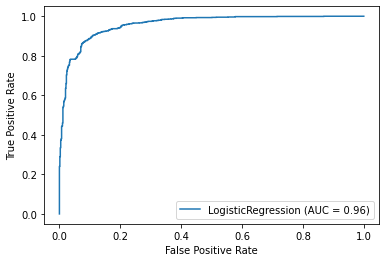

In [60]:
#plotting ROC for logistics regression
ROC(model_LR,X_test,y_test)

In [61]:
y = []
for val in y_test:
    y.append(val)

In [62]:
PRINT_METRICS('MODEL:LOGISTICS_REGRESSION',y,y_predL,accuracies2,0)

MODEL:LOGISTICS_REGRESSION
Precision:0.8934396969116722|Recall:0.8928690443347601|F1_measure:0.8931514169747221|accuracy:0.8975386376645679


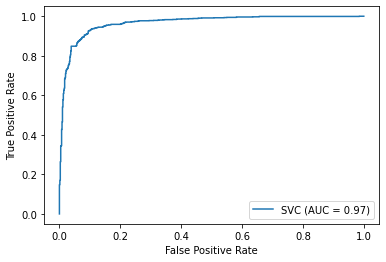

In [63]:
#plotting ROC for SVM_LINEAR
ROC(model_SVMLinear,X_test,y_test)

In [64]:
PRINT_METRICS('MODEL:SVM(LINEAR)',y,y_predSVML,accuracies2,1)

MODEL:SVM(LINEAR)
Precision:0.9151120858900745|Recall:0.9141029388065043|F1_measure:0.9145990818634705|accuracy:0.9181453921007441


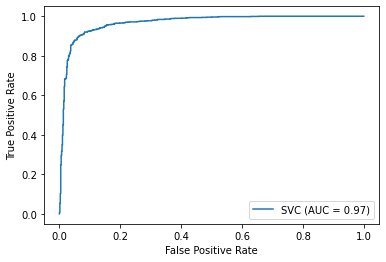

In [65]:
ROC(model_SVMRBF,X_test,y_test)

In [66]:
PRINT_METRICS('MODEL:SVM(RBF)',y,y_predSVMR,accuracies2,2)

MODEL:SVM(RBF)
Precision:0.9114816617981174|Recall:0.9155492609962824|F1_measure:0.9133552644094235|accuracy:0.9164281625643961


In [67]:
accuracies = []

In [68]:
#we plotted the ROC curve for three models comparison will be made for SVM linear only
accuracies.append(accuracies1[1])
accuracies.append(accuracies2[1])

Text(0, 0.5, 'Accuracy')

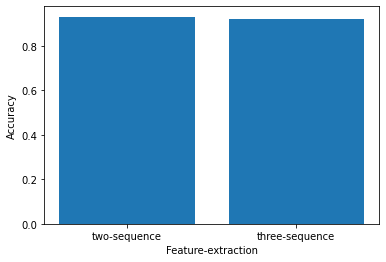

In [76]:
Sx = ('two-sequence','three-sequence')
y = (accuracies[0],accuracies[1])
plt.bar(x,y,align='center') # A bar chart
plt.xlabel('Feature-extraction')
plt.ylabel('Accuracy')